In [2]:
from switss.model import DTMC
import numpy as np
from switss.utils import color_from_hash

# example on how to retrieve SCCs from a DTMC
# setup the graph
# ----------------
E = [[0,1],[1,2],[2,0],[3,2],[3,1],[3,5],[4,2],[4,6],[5,4],[5,3],[6,4],[7,5],[7,6],[7,7]]
P = np.zeros(shape=(8,8))
for u,v in E:
    # initialize with arbitrary probabilities
    ucount = len([w for w,z in E if w == u])
    P[u,v] = 1/ucount
# ----------------

# create DTMC
dtmc = DTMC(P)

print("Transitions:")
print(dtmc.P)

Transitions:
  (0, 1)	1.0
  (1, 2)	1.0
  (2, 0)	1.0
  (3, 1)	0.3333333333333333
  (3, 2)	0.3333333333333333
  (3, 5)	0.3333333333333333
  (4, 2)	0.5
  (4, 6)	0.5
  (5, 3)	0.5
  (5, 4)	0.5
  (6, 4)	1.0
  (7, 5)	0.3333333333333333
  (7, 6)	0.3333333333333333
  (7, 7)	0.3333333333333333


components: [5 5 5 1 4 2 3 0] MEC components count: [0 0 0 0 0 1] MEC amount: 6


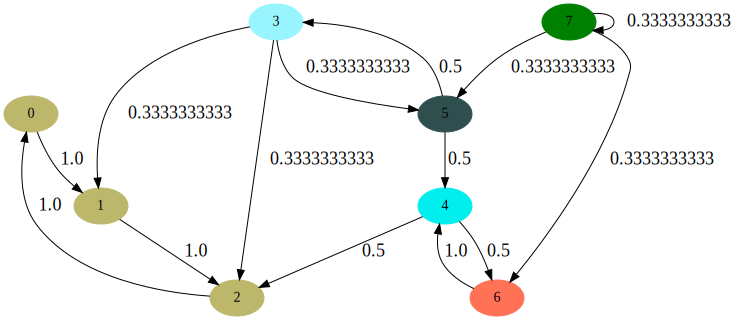

In [3]:
# using the example-DTMC above, we can retrieve its MECs.
# 0-entries identify states that are not part of any MEC.
components,mec_count,mec_counter = dtmc.maximal_end_components()
print("components:",components,"MEC components count:", mec_count, "MEC amount:", mec_counter)

def sm(stateidx,labels):
    # give every state a green color that is not part of any MEC
    color = "green" if components[stateidx] == 0 else color_from_hash(7*components[stateidx])
    return { "color" : color, "style" : "filled" } 

dtmc.digraph(state_map=sm)

In [12]:
component_members = {}

for vertex, component in enumerate(components):
    if component not in component_members:
        component_members[component] = []
    component_members[component].append(vertex)

print(component_members)

mec_partition = list(component_members.values())

print(mec_partition)

{5: [0, 1, 2], 1: [3], 4: [4], 2: [5], 3: [6], 0: [7]}
[[0, 1, 2], [3], [4], [5], [6], [7]]


In [9]:
from switss.utils.graph_utils import underlying_graph, quotient

quotient_MEC_graph = quotient(underlying_graph(dtmc.P), mec_partition)

KeyboardInterrupt: 